In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive

/content/drive


In [3]:
cd MyDrive

/content/drive/MyDrive


In [4]:
cd DGGAN

/content/drive/MyDrive/DGGAN


In [5]:
cd code


/content/drive/MyDrive/DGGAN/code


In [ ]:
pwd

In [ ]:
!tf_upgrade_v2 \
--infile /content/drive/MyDrive/DGGAN/code/discriminator.py \
--outfile /content/drive/MyDrive/DGGAN/code/new_discriminator.py

In [10]:
!python dggan.py

2023-06-04 07:12:02.831405: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 07:12:04.435738: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
reading graph...
[0.53] reading graph finished. #node = 55494
building DGGAN model...
restore...
2023-06-04 07:12:10.998990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
start traning...
epoch 0
dis_loss=7.5817 pos_loss=0.0128 neg_loss_0=0.4642 neg_loss_1=0.2719 neg_loss_2=0.4513 neg_loss_3=6.3816
auc_0=1.0000 auc_50=1.0000 auc_100=1.0000
dis_loss=7.5200 pos_loss=0.0128 neg_loss_0=0.4560 neg_loss_1=0.2657 neg_loss_2=0.4404 neg_loss_3=6.3451Traceback (most recent call last):
  File "/content/drive/My

In [ ]:
!pip install annoy

In [8]:
file1=open('/content/drive/MyDrive/DGGAN/1.txt','r')
file1_new=open('test_0.5_0','w')
file2=open('/content/drive/MyDrive/DGGAN/2.txt','r')
file2_new=open('test_0.5_100','w')
file3=open('/content/drive/MyDrive/DGGAN/3.txt','r')
file3_new=open('test_0.5_50','w')

for line in file1:
  line_file=line.split('\t')
  linee=line_file[1].replace('\n','')
  file1_new.write(str(line_file[0])+' '+str(linee)+' '+'1'+'\n')
for line in file2:
  line_file=line.split('\t')
  linee=line_file[1].replace('\n','')
  file2_new.write(str(line_file[0])+' '+str(linee)+' '+'1'+'\n') 
for line in file3:
  line_file=line.split('\t')
  linee=line_file[1].replace('\n','')
  file3_new.write(str(line_file[0])+' '+str(linee)+' '+'1'+'\n') 


file1.close()
file1_new.close()
file2.close()
file2_new.close()
file3.close()
file3_new.close()






In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def build_embedding_matrix(file1, file2,n_node):
    embeddings_1 = []
    embeddings_2 = []

    # Read the first embedding file
    with open(file1, 'r') as f1:
        i=0
        next(f1)  # Skip the first line
        for line in f1:
          if(i<n_node):
            parts = line.strip().split(' ')
            node_id = int(parts[0])
            embedding = [float(x) for x in parts[1:]]
            embeddings_1.append(embedding)
            i=i+1
          else:
            break  

    # Read the second embedding file
    with open(file2, 'r') as f2:
        i=0
        next(f2)  # Skip the first line
        for line in f2:
          if(i<n_node):
            parts = line.strip().split(' ')
            node_id = int(parts[0])
            embedding = [float(x) for x in parts[1:]]
            embeddings_2.append(embedding)
            i=i+1
          else:
            break  

        

    # Convert the embeddings to NumPy arrays
    embeddings_1 = np.array(embeddings_1)
    embeddings_2 = np.array(embeddings_2)

    # Determine the dimensions of the matrix
    n1, emd_dim1 = embeddings_1.shape
    n2, emd_dim2 = embeddings_2.shape

    # Create the final matrix
    embedding_matrix = np.empty((2, max(n1, n2), max(emd_dim1, emd_dim2)))
    embedding_matrix[0, :n1, :emd_dim1] = embeddings_1
    embedding_matrix[1, :n2, :emd_dim2] = embeddings_2

    return embedding_matrix

# Example usage
file1 = '/content/drive/MyDrive/DGGAN/results/link_prediction/cite37-dis_s.emb'
file2 = '/content/drive/MyDrive/DGGAN/results/link_prediction/cite37-dis_t.emb'
n_node = 10000  # Number of nodes in the graph
emd_dim = 128  # Dimension of the embeddings

matrix = build_embedding_matrix(file1, file2, n_node)
def calculate_distances(embedding_matrix):
    # Reshape the matrix to a 2D array
    flattened_matrix = np.reshape(embedding_matrix, (2 * embedding_matrix.shape[1], embedding_matrix.shape[2]))

    # Calculate pairwise distances using the Euclidean distance metric
    distances = cdist(flattened_matrix, flattened_matrix, metric='euclidean')

    return distances

# Assuming you have the embedding matrix stored in the 'matrix' variable
distances = calculate_distances(matrix)
percentile_5 = np.percentile(distances, 10)
print('Thershold: ',percentile_5)

Thershold:  0.3295641954162797


In [ ]:
import numpy as np
from scipy.spatial.distance import pdist

# Load the embeddings from the file
embeddings = np.loadtxt('/content/drive/MyDrive/DGGAN/results/link_prediction/cite37-dis_t.emb', skiprows=1, usecols=range(1, 129), delimiter=' ')

# Number of nodes to consider
num_nodes = 50000

# Select the first num_nodes embeddings
selected_embeddings = embeddings[:num_nodes]

# Calculate pairwise distances between selected embeddings
distances = pdist(selected_embeddings)

# Calculate the 5th percentile distance
threshold_distance = np.percentile(distances, 5) #5,10

print('Threshold distance:', threshold_distance)

In [ ]:
import numpy as np

emb_filenames = ['/content/drive/MyDrive/DGGAN/results/link_prediction/cite37-gen.emb', '/content/drive/MyDrive/DGGAN/results/link_prediction/cite37-dis_s.emb', '/content/drive/MyDrive/DGGAN/results/link_prediction/cite37-dis_t.emb']
embedding_arrays = []

# Read the contents of each file and store them as arrays
for filename in emb_filenames:
    with open(filename, 'r') as file:
        lines = file.readlines()
        embedding_array = []
        for line in lines[1:]:  # Skip the first line
            values = line.strip().split()[1:]  # Skip the first value (node ID)
            embedding = np.array([float(value) for value in values])
            embedding_array.append(embedding)
        embedding_arrays.append(embedding_array)

# Pad the embedding arrays to have a consistent number of nodes
max_nodes = max(len(embedding_array) for embedding_array in embedding_arrays)
embedding_arrays = [np.pad(embedding_array, ((0, max_nodes - len(embedding_array)), (0, 0)), mode='constant')
                    for embedding_array in embedding_arrays]

# Combine the embedding arrays into a single embedding matrix
embedding_matrix = np.stack(embedding_arrays, axis=0)

# The resulting embedding matrix has shape (2, 55493, 128)
print(embedding_matrix.shape)

import numpy as np
from scipy.spatial.distance import cdist

def calculate_distances(embedding_matrix, num_nodes):
    num_selected = min(num_nodes, embedding_matrix.shape[1])
    selected_indices = np.random.choice(embedding_matrix.shape[1], size=num_selected, replace=False)
    selected_embeddings = embedding_matrix[:, selected_indices, :]
    distances = cdist(selected_embeddings[0], selected_embeddings[1], metric='euclidean')
    return distances

def get_5th_percentile(distances):
    percentile_5 = np.percentile(distances, 5)
    return percentile_5

# Example usage
num_nodes = 1000  # Number of nodes to select randomly

distances = calculate_distances(embedding_matrix, num_nodes)
percentile_5 = get_5th_percentile(distances)

print("5th Percentile of Distances:", percentile_5)



(3, 55494, 128)
5th Percentile of Distances: 2.0408477055278396


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from statistics import quantiles
import csv
import re
from decimal import Decimal


# Initialize lists to store source and target node IDs
source_nodes = []
target_nodes = []
links=[]
num_nodes = 100
# Read the CSV file
with open('/content/drive/MyDrive/DGGAN/Data_Final_raw.csv', 'r') as file:
    reader = csv.reader(file)
   #next(reader)  # Skip the header row if present
    for row in reader:
      # Assuming target node ID is in the second column
        source_nodes.append(int(row[0]))
        target_nodes.append(int(row[1]))
        links.append([int(row[0]),int(row[1])])
      

# Constants
#embedding_file = '/content/drive/MyDrive/DGGAN/results/link_prediction/cite0-dis_t.emb'
embedding_dim = 128
num_trees = 1000  # Number of nodes to consider for link prediction
threshold_percentile = 5
threshold_distance= 0.14039921032076363

data_file=''
# Load the node embeddings from the file
#with open(embedding_file, 'r') as f:
 #   lines = f.readlines()[1:]  # Skip the first line
  #  embeddings = [list(map(float, line.split()[1:])) for line in lines]
i=0
#embeddings=np.loadtxt('/content/drive/MyDrive/DGGAN/results/link_prediction/cite0-dis_t.emb', skiprows=1, usecols=range(1, 129), delimiter=' ')





embedding_matrix = []
with open('/content/drive/MyDrive/DGGAN/results/link_prediction/cite0-gen.emb', 'r') as file:
    next(file)  # Skip the first line
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespace
        values = line.split()  # Split line into individual values
        numbers = [Decimal(value).quantize(Decimal('0.00000000000000000000')) for value in values[1:]]  # Convert values to Decimal with desired precision
        embedding_matrix.append(numbers)

# Convert the matrix to a NumPy array of Decimal objects
embedding_matrix = np.array(embedding_matrix, dtype=object)



#embeddings = np.array(embeddings)

node1=6570
node2=20608
dot_product=embedding_matrix[node1].dot(embedding_matrix[node2])
last_digit = str(dot_product)[-1]
print(last_digit)
if int(last_digit)>=0:
    print(str(node1) + '--->' +str(node2) +' '+'LINK')
else:
    print(str(node1) + '--->' +str(node2) +' '+'NO LINK')
'''    
#with open('total_results.txt', 'w') as outfile:
for link in links:
    if(i<=num_nodes):
      source_node=int(link[0])
      target_node=int(link[1])
      dot_product=embeddings[source_node].dot(embeddings[target_node])
      if dot_product>=0:
        print(str(source_node) + '--->' +str(target_node) +' '+'LINK')
      else:
        print(str(source_node) + '--->' +str(target_node) +' '+'NO LINK')
      i=i+1  
    else:
      break 
'''       









'''
def has_link(node_id1, node_id2):
    node_index1 = node_id1 - 1  # Convert node ID to 0-based index
    node_index2 = node_id2 - 1  # Convert node ID to 0-based index
    embedding1 = embeddings[node_index1]
    embedding2 = embeddings[node_index2]
    distance = np.linalg.norm(embedding1 - embedding2)
    return distance <= threshold_distance


# Perform link prediction for the first 10000 nodes
predicted_links = []

for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        node_id1 = i + 1  # Convert back to 1-based node ID
        node_id2 = j + 1  # Convert back to 1-based node ID
        if has_link(node_id1, node_id2):
            predicted_links.append((node_id1, node_id2))

correctly_predicted=0
uncorecttly_predicted=0
# Print predicted links
print('Predicted links:')
for link in predicted_links:
  link1=int(link[0])
  link2=int(link[1])
  total_link=[link1,link2]
  source=int(link[0])
  target=int(link[1])
  if(source in source_nodes and target in target_nodes):
    if(total_link in links):
      correctly_predicted= correctly_predicted+1
    else:
      uncorecttly_predicted=uncorecttly_predicted+1
print('correctly predicted: ',correctly_predicted)
print('uncorrectly predicted: ',uncorecttly_predicted)
'''

7
6570--->20608 LINK


"\ndef has_link(node_id1, node_id2):\n    node_index1 = node_id1 - 1  # Convert node ID to 0-based index\n    node_index2 = node_id2 - 1  # Convert node ID to 0-based index\n    embedding1 = embeddings[node_index1]\n    embedding2 = embeddings[node_index2]\n    distance = np.linalg.norm(embedding1 - embedding2)\n    return distance <= threshold_distance\n\n\n# Perform link prediction for the first 10000 nodes\npredicted_links = []\n\nfor i in range(num_nodes):\n    for j in range(i + 1, num_nodes):\n        node_id1 = i + 1  # Convert back to 1-based node ID\n        node_id2 = j + 1  # Convert back to 1-based node ID\n        if has_link(node_id1, node_id2):\n            predicted_links.append((node_id1, node_id2))\n\ncorrectly_predicted=0\nuncorecttly_predicted=0\n# Print predicted links\nprint('Predicted links:')\nfor link in predicted_links:\n  link1=int(link[0])\n  link2=int(link[1])\n  total_link=[link1,link2]\n  source=int(link[0])\n  target=int(link[1])\n  if(source in source_n

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
import config
from scipy.spatial.distance import pdist, squareform

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LinkPrediction():
    def __init__(self, config):
        self.links = [[], [], []]
        sufs = ['_0', '_50', '_100']
        for i, suf in enumerate(sufs):
            with open(config.test_file + suf) as infile:
                for line in infile.readlines():
                    s, t, label = [int(item) for item in line.strip().split()]
                    self.links[i].append([s, t, label])

    def evaluate(self, embedding_matrix):
        test_y = [[], [], []]
        pred_y = [[], [], []]
        pred_label = [[], [], []]
        node_ids = [[], [], []]  # Added to store node IDs
        distances = [[], [], []]  # Added to store distances between nodes

        pairwise_distances = pdist(embedding_matrix[1], metric='euclidean')
        pairwise_distances = squareform(pairwise_distances)
        threshold = np.percentile(pairwise_distances, 5)
        for i in range(len(self.links)):
            for s, t, label in self.links[i]:
                test_y[i].append(label)
                embedding_s = embedding_matrix[0][s].flatten()  # Flatten the source embedding
                embedding_t = embedding_matrix[1][t].flatten()  # Flatten the target embedding
                pred_value = np.dot(embedding_s, embedding_t)
               # pred_y[i].append(embedding_matrix[0][s].dot(embedding_matrix[1][t]))
                euclidean_dist =distance = np.linalg.norm(embedding_s - embedding_t)
                pred_y[i].append(euclidean_dist)
                #if pred_y[i][-1] >= 0:
                 #   pred_label[i].append(1)
                #else:
                 #   pred_label[i].append(0)
                if euclidean_dist <= threshold:
                    pred_label[i].append(1)  # Nodes are predicted to be linked
                else:
                    pred_label[i].append(0)  # Nodes are predicted not to be linked
                node_ids[i].append((s, t))  # Store node IDs
    

        auc = [0, 0, 0]
        for i in range(len(test_y)):
            auc[i] = roc_auc_score(test_y[i], pred_y[i])
        with open('total_result.txt', 'w') as outfile:
            for i in range(len(test_y)):
                outfile.write(f"AUC-{i}: {auc[i]:.4f}\n")
                for j in range(len(node_ids[i])):
                    s, t = node_ids[i][j]
                    outfile.write(f"Node IDs: {s}, {t}\n")
                    outfile.write(f"Test Label: {test_y[i][j]}\n")
                    outfile.write(f"Predicted Value: {pred_y[i][j]}\n")
                    outfile.write(f"Predicted Label: {pred_label[i][j]}\n")
                    outfile.write(f"Distance: {distances[i][j]}\n")
                    outfile.write('\n')
                outfile.write(f"Threshold: {threshold}\n")      
        return auc

#config = '/content/drive/MyDrive/DGGAN/code/config.py'

link_prediction = LinkPrediction(config)
#embedding_matrix = np.load('/content/drive/MyDrive/DGGAN/results/link_prediction/cite0-dis_t.emb',allow_pickle=True)
import numpy as np

embedding_dim = 128
num_nodes = 55493

embedding_matrix = np.zeros((2, num_nodes, embedding_dim))

with open('/content/drive/MyDrive/DGGAN/results/link_prediction/cite0-dis_t.emb', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:  # Skip the first line
        line = line.strip().split()
        node_id = int(line[0])
        embedding = np.array([float(value) for value in line[1:]])

        # Assign the embedding to the corresponding node in the matrix
        if node_id < num_nodes:
            embedding_matrix[0][node_id] = embedding
        else:
            embedding_matrix[1][node_id - num_nodes] = embedding

auc_scores = link_prediction.evaluate(embedding_matrix)



ValueError: ignored

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Read the graph data from the text file
with open('/content/drive/MyDrive/DGGAN/part.txt', 'r') as file:
    lines = file.readlines()


plt.figure(figsize=(100, 100))
# Create a NetworkX graph
graph = nx.Graph()

# Add edges to the graph
for line in lines:
    source, target = line.strip().split('\t')
    graph.add_edge(source, target)

# Draw the graph
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray')
# Display the graph
plt.savefig('graph.png', format='png')
plt.show()


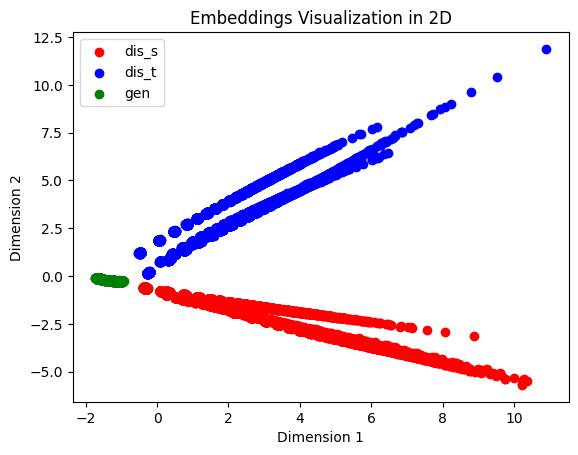

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r') as f:
        next(f)
        for line in f:
            parts = line.strip().split(' ')
            node_id = int(parts[0])
            embedding = list(map(float, parts[1:]))
            embeddings[node_id] = embedding
    return embeddings

dis_s = load_embeddings('/content/drive/MyDrive/DGGAN/results/link_prediction/cite0-dis_s.emb')
dis_t = load_embeddings('/content/drive/MyDrive/DGGAN/results/link_prediction/cite0-dis_t.emb')
gen = load_embeddings('/content/drive/MyDrive/DGGAN/results/link_prediction/cite0-gen.emb')
# Assuming you have loaded the embeddings into `dis_s`, `dis_t`, and `gen`


# Combine the embeddings into a single matrix
embeddings = np.array(list(dis_s.values()) + list(dis_t.values()) + list(gen.values()))

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Separate the embeddings of dis_s, dis_t, and gen
dis_s_2d = embeddings_2d[:len(dis_s)]
dis_t_2d = embeddings_2d[len(dis_s):len(dis_s) + len(dis_t)]
gen_2d = embeddings_2d[len(dis_s) + len(dis_t):]

# Plot the embeddings in 2D
plt.scatter(dis_s_2d[:, 0], dis_s_2d[:, 1], c='red', label='dis_s')
plt.scatter(dis_t_2d[:, 0], dis_t_2d[:, 1], c='blue', label='dis_t')
plt.scatter(gen_2d[:, 0], gen_2d[:, 1], c='green', label='gen')
plt.legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Embeddings Visualization in 2D')
plt.show()

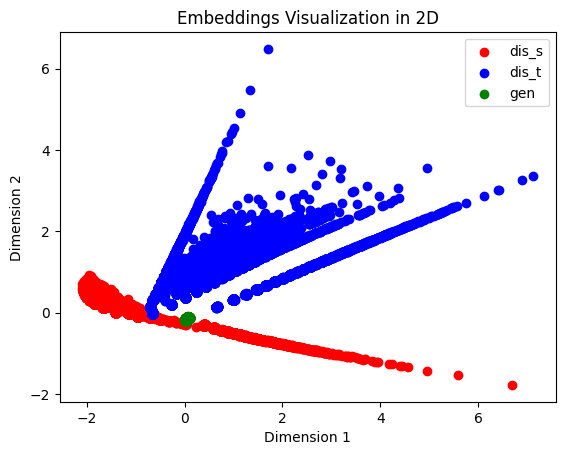

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r') as f:
        next(f)
        for line in f:
            parts = line.strip().split(' ')
            node_id = int(parts[0])
            embedding = list(map(float, parts[1:]))
            embeddings[node_id] = embedding
    return embeddings

dis_s = load_embeddings('/content/drive/MyDrive/DGGAN/results/link_prediction/cite5-dis_s.emb')
dis_t = load_embeddings('/content/drive/MyDrive/DGGAN/results/link_prediction/cite5-dis_t.emb')
gen = load_embeddings('/content/drive/MyDrive/DGGAN/results/link_prediction/cite5-gen.emb')
# Assuming you have loaded the embeddings into `dis_s`, `dis_t`, and `gen`


# Combine the embeddings into a single matrix
embeddings = np.array(list(dis_s.values()) + list(dis_t.values()) + list(gen.values()))

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Separate the embeddings of dis_s, dis_t, and gen
dis_s_2d = embeddings_2d[:len(dis_s)]
dis_t_2d = embeddings_2d[len(dis_s):len(dis_s) + len(dis_t)]
gen_2d = embeddings_2d[len(dis_s) + len(dis_t):]

# Plot the embeddings in 2D
plt.scatter(dis_s_2d[:, 0], dis_s_2d[:, 1], c='red', label='dis_s')
plt.scatter(dis_t_2d[:, 0], dis_t_2d[:, 1], c='blue', label='dis_t')
plt.scatter(gen_2d[:, 0], gen_2d[:, 1], c='green', label='gen')
plt.legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Embeddings Visualization in 2D')
plt.show()

KeyboardInterrupt: ignored

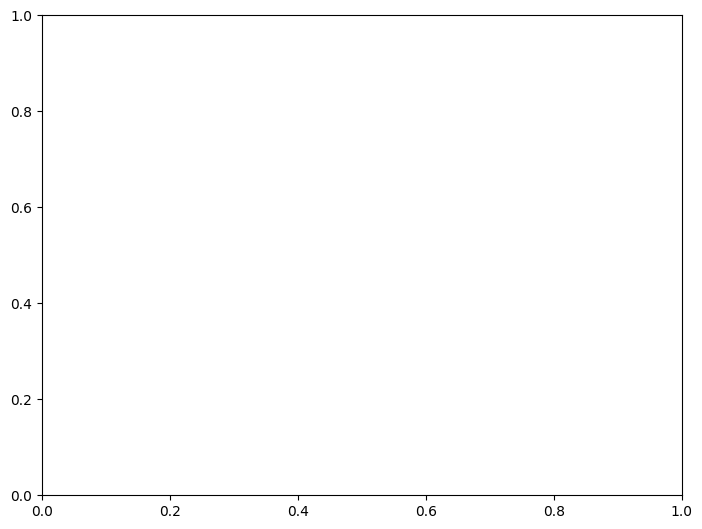

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Read the text file and construct the graph
graph = nx.Graph()
with open('/content/drive/MyDrive/DGGAN/data/cite/train_0.5.5_old', 'r') as file:
    for line in file:
        node1, node2 = line.strip().split(' ')
        graph.add_edge(node1, node2)

# Visualize the graph
nx.draw(graph, with_labels=True)
plt.show()

In [ ]:
fake_nodes_file= open('/content/drive/MyDrive/DGGAN/data/cite/fake_nodes.txt','r')
real_nodes_file=open('/content/drive/MyDrive/DGGAN/data/cite/train_3.csv','r')
test1=open('/content/drive/MyDrive/DGGAN/data/cite/test_0.5_50','w')
#test2=open('/content/drive/MyDrive/DGGAN/data/cite/test_0.5_50')
#test3=open('/content/drive/MyDrive/DGGAN/data/cite/test_0.5_100')


reader = csv.reader(real_nodes_file)
i=0
for row in reader:
  if(i<=3185):
    fake_line=fake_nodes_file.readline()
    fake_line=fake_line.split(' ')
    test1.write(str(row[0])+' '+str(row[1])+' '+'1'+'\n')
    test1.write(str(fake_line[0])+' '+str(fake_line[1])+' '+'0'+'\n')
    i=i+1
  else:
    break  
i=0
for row in reader:
  if(i<=3185):
    fake_line=fake_nodes_file.readline()
    fake_line=fake_line.split(' ')
    test1.write(str(row[0])+' '+str(row[1])+' '+'1'+'\n')
    test1.write(str(row[1])+' '+str(row[0])+' '+'0'+'\n')
    i=i+1
  else:
    break     










test1.close()
#test2.close()
#test3.close()
real_nodes_file.close()




In [ ]:
train_file=open('/content/drive/MyDrive/DGGAN/training.csv','r')
train_file_positive_edges=open('/content/drive/MyDrive/DGGAN/data/cite/train_0.5_positive_edges_1.csv','r')
new_train_file = open('/content/drive/MyDrive/DGGAN/train_minus_positive_edges.txt','w')
reader1 = csv.reader(train_file)
reader2 = csv.reader(train_file_positive_edges)

train_file_list=[]
positive_edges_list=[]

for row1 in reader1:
  train_file_list.append([int(row1[0]),int(row1[1])])
for row2 in reader2:
  positive_edges_list.append([int(row2[0]),int(row2[1])])

train_file.close()
train_file_positive_edges.close()

for elem in train_file_list:
  try:
    index=positive_edges_list.index(elem)
    continue
  except ValueError:
    new_train_file.write(str(elem[0])+' '+str(elem[1])+'\n')

new_train_file.close()





Get positive connections that will be used in testing file

In [ ]:
import csv

In [ ]:
train_file=open('/content/drive/MyDrive/DGGAN/data/cite/data_half_2.csv','r')
reader = csv.reader(train_file)
train_file_positive_edges=open('/content/drive/MyDrive/DGGAN/data/cite/train_0.5_positive_edges_2.csv','w')
writer=csv.writer(train_file_positive_edges)
nodes=[]
occur=[]
for i in range(55495):
  occur.append(0)
for list_row in reader:
  if(int(list_row[0]) not in nodes):
    nodes.append(int(list_row[0]))
    occur[int(list_row[0])] = 1
  elif(int(list_row[0]) in nodes):
    occur[int(list_row[0])] =occur[int(list_row[0])] + 1
  if(int(list_row[1]) not in nodes):
    nodes.append(int(list_row[1]))
    occur[int(list_row[1])] = 1
  elif(int(list_row[1]) in nodes):
     occur[int(list_row[1])] =occur[int(list_row[1])] + 1
  else:
     continue  
train_file.close()
train_file=open('/content/drive/MyDrive/DGGAN/data/cite/data_half_1.csv','r')
reader = csv.reader(train_file)
#train_file.seek(0)
for list_row in reader:
  if(occur[int(list_row[0])] > 2 and occur[int(list_row[1])] >2):
    writer.writerow([int(list_row[0]),int(list_row[1])])
    occur[int(list_row[0])] = occur[int(list_row[0])] -1
    occur[int(list_row[1])] = occur[int(list_row[1])] -1

train_file.close()
train_file_positive_edges.close()


In [ ]:
#Conver emb files in csv files

In [ ]:
import pandas as pd

# Load the .emb file
emb_file_path = "/content/drive/MyDrive/DGGAN/results/link_prediction/cora/4-gen.emb"
with open(emb_file_path, "r") as f:
    content = f.readlines()

# Extract the node IDs and embeddings from the file
node_embeddings = [line.split() for line in content[1:]]
node_ids = [node_emb[0] for node_emb in node_embeddings]
embeddings = [list(map(float, node_emb[1:])) for node_emb in node_embeddings]

# Create a DataFrame with the node IDs and embeddings
df = pd.DataFrame({"node_id": node_ids, "embedding": embeddings})

# Split the embedding into separate columns
df[["emb_" + str(i) for i in range(len(embeddings[0]))]] = pd.DataFrame(df["embedding"].tolist())

# Drop the original "embedding" column
df.drop("embedding", axis=1, inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = "/content/drive/MyDrive/DGGAN/results/link_prediction/cora/4-gen.csv"
df.to_csv(csv_file_path, index=False)

In [ ]:
#PLOT VECTORS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the embeddings from the CSV file
#df = pd.read_csv('/content/drive/MyDrive/DGGAN/results/link_prediction/cora/0-dis_s.csv', header=None)
df = pd.read_csv('/content/drive/MyDrive/DGGAN/results/link_prediction/cora/0-dis_s.csv', skiprows=[0])
# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
pca.fit(df)
reduced_embeddings = pca.transform(df)

# Plot the reduced embeddings using a scatter plot
plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1])
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 23166 samples in 0.011s...
[t-SNE] Computed neighbors for 23166 samples in 6.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23166
[t-SNE] Computed conditional probabilities for sample 2000 / 23166
[t-SNE] Computed conditional probabilities for sample 3000 / 23166
[t-SNE] Computed conditional probabilities for sample 4000 / 23166
[t-SNE] Computed conditional probabilities for sample 5000 / 23166
[t-SNE] Computed conditional probabilities for sample 6000 / 23166
[t-SNE] Computed conditional probabilities for sample 7000 / 23166
[t-SNE] Computed conditional probabilities for sample 8000 / 23166
[t-SNE] Computed conditional probabilities for sample 9000 / 23166
[t-SNE] Computed conditional probabilities for sample 10000 / 23166
[t-SNE] Computed conditional probabilities for sample 11000 / 23166
[t-SNE] Computed conditional probabilities for sample 12000 / 23166
[t-SNE] Computed conditional probabilities for sam

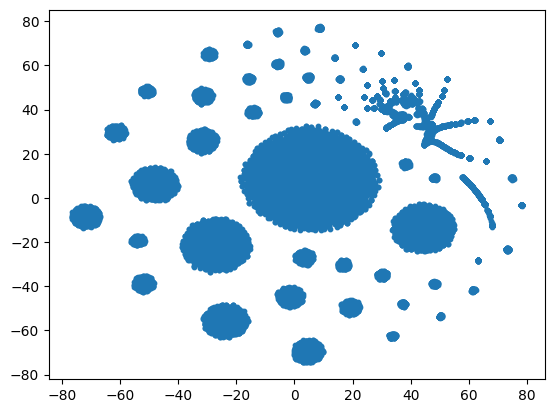

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# load the embeddings
emb_df = pd.read_csv('/content/drive/MyDrive/DGGAN/results/link_prediction/cora/4-dis_s.emb', skiprows=1, sep=' ', header=None, index_col=0)

# convert dataframe to numpy array
emb = emb_df.values

# reduce the dimensionality of embeddings to 2 using t-SNE
tsne = TSNE(n_components=2, perplexity=30, verbose=1)
emb_tsne = tsne.fit_transform(emb)

# visualize the embeddings
plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], s=10)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 23166 samples in 0.010s...
[t-SNE] Computed neighbors for 23166 samples in 6.356s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23166
[t-SNE] Computed conditional probabilities for sample 2000 / 23166
[t-SNE] Computed conditional probabilities for sample 3000 / 23166
[t-SNE] Computed conditional probabilities for sample 4000 / 23166
[t-SNE] Computed conditional probabilities for sample 5000 / 23166
[t-SNE] Computed conditional probabilities for sample 6000 / 23166
[t-SNE] Computed conditional probabilities for sample 7000 / 23166
[t-SNE] Computed conditional probabilities for sample 8000 / 23166
[t-SNE] Computed conditional probabilities for sample 9000 / 23166
[t-SNE] Computed conditional probabilities for sample 10000 / 23166
[t-SNE] Computed conditional probabilities for sample 11000 / 23166
[t-SNE] Computed conditional probabilities for sample 12000 / 23166
[t-SNE] Computed conditional probabilities for sam

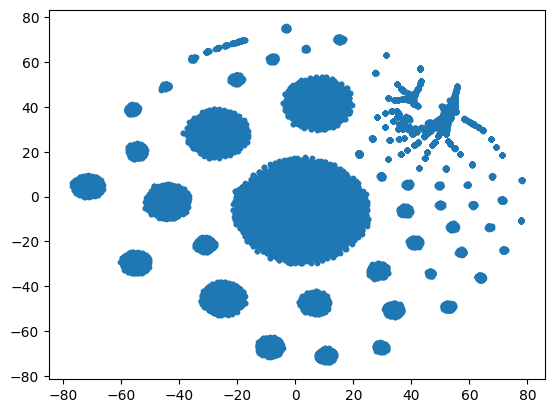

In [ ]:
emb_df = pd.read_csv('/content/drive/MyDrive/DGGAN/results/link_prediction/cora/4-dis_t.emb', skiprows=1, sep=' ', header=None, index_col=0)

# convert dataframe to numpy array
emb = emb_df.values

# reduce the dimensionality of embeddings to 2 using t-SNE
tsne = TSNE(n_components=2, perplexity=30, verbose=1)
emb_tsne = tsne.fit_transform(emb)

# visualize the embeddings
plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], s=10)
plt.show()

In [ ]:
# Create DataSet

In [ ]:
import csv
with open('/content/drive/MyDrive/DGGAN/to_test.csv', 'r') as file:
    reader = csv.reader(file)
    citiation=[]
    referenced=[]
    is_connected = []
    for row in reader:
       # x = row.split('/t')
        citiation.append(row[0])
        referenced.append(row[1])
        is_connected.append('1')
        #reveresed
        citiation.append(row[1])
        referenced.append(row[0])
        is_connected.append('0')
        #########################################
    file_to_save=open('/content/drive/MyDrive/DGGAN/to_test_ones_and_zeroes.csv','w')
    for i in range(len(citiation)):
      print(citiation[i]+' '+referenced[i]+' '+is_connected[i])
      writer=csv.writer(file_to_save)
      writer.writerow([int(citiation[i]), int(referenced[i]), is_connected[i]])
    file_to_save.close()  






In [ ]:
file_new= open('/content/drive/MyDrive/DGGAN/data/cite/train_0.5','w')
file_old = open('/content/drive/MyDrive/DGGAN/data/cite/train.txt','r')
for row in file_old:
  file_new.write(row.replace('\t',' '))
file_new.close()
file_old.close()  


In [ ]:
!python dggan.py

In [ ]:

test1=open('/content/drive/MyDrive/DGGAN/data/cite/test_0.5_0','r')
test2=open('/content/drive/MyDrive/DGGAN/data/cite/test_0.5_50','r')
test3=open('/content/drive/MyDrive/DGGAN/data/cite/test_0.5_100','r')
train=open('/content/drive/MyDrive/DGGAN/data/cite/train_0.5','r')

test1_new=open('/content/drive/MyDrive/DGGAN/data/cite/test_0.5_0_new','w')
test2_new=open('/content/drive/MyDrive/DGGAN/data/cite/test_0.5_50_new','w')
test3_new=open('/content/drive/MyDrive/DGGAN/data/cite/test_0.5_100_new','w')
train_new=open('/content/drive/MyDrive/DGGAN/data/cite/train_0.5_new','w')

test1_nodes=[]
test_1_rows=[]
test_1_zeroes=[]
test2_nodes=[]
test_2_rows=[]
test_2_zeroes=[]
test3_nodes=[]
test_3_rows=[]
test_3_zeroes=[]
train_nodes=[]
train_rows=[]

for row in test1:
  list_row=row.split(' ')
  if(list_row[0] not in test1_nodes and int(list_row[2]) != 0):
    test1_nodes.append(list_row[0]) 
  if(list_row[1] not in test1_nodes and int(list_row[2]) != 0):
    test1_nodes.append(list_row[1]) 
  if(int(list_row[2]) == 0):
    test_1_zeroes.append([list_row[0],list_row[1]])
    continue    
  test_1_rows.append([list_row[0],list_row[1]])
  

for row in test2:
  list_row=row.split(' ')
  if(list_row[0] not in test2_nodes and int(list_row[2]) != 0):
     test2_nodes.append(list_row[0]) 
  if(list_row[1] not in test2_nodes and int(list_row[2]) != 0):
    test2_nodes.append(list_row[1]) 
  if(int(list_row[2]) == 0):
    test_2_zeroes.append([list_row[0],list_row[1]])
    continue    
  test_2_rows.append([list_row[0],list_row[1]])
  

for row in test3:
  list_row=row.split(' ')
  if(list_row[0] not in test1_nodes and int(list_row[2]) != 0):
    test3_nodes.append(list_row[0]) 
  if(list_row[1] not in test3_nodes and int(list_row[2]) != 0):
    test3_nodes.append(list_row[1]) 
  if(int(list_row[2]) == 0):
    test_3_zeroes.append([list_row[0],list_row[1]])
    continue    
  test_3_rows.append([list_row[0],list_row[1]])
   


for row in train:
  list_row=row.split(' ')
  if(list_row[0] not in train_nodes):
    train_nodes.append(list_row[0])
  if(list_row[1] not in train_nodes):
    train_nodes.append(list_row[1])
  train_rows.append([list_row[0],list_row[1]]) 


for item in test1_nodes:
  try:
    index=train_nodes.index(item)
  except ValueError:
    for i in range(len(test_1_rows)):
      if(int(test_1_rows[i][0]).__eq__(int(item)) or int(test_1_rows[i][1]).__eq__(int(item))):
        test_1_rows[i][1].replace('\n','')
        train_rows.append(test_1_rows[i])
        train_nodes.append(item)
        test1_nodes.remove(item)
        test_1_rows.remove(test_1_rows[i])
        test_1_zeroes.remove(test_1_zeroes[i])
        break

for item in test2_nodes:
  try:
    index=train_nodes.index(item)
  except ValueError:
    for i in range(len(test_2_rows)):
      if(int(test_2_rows[i][0]).__eq__(int(item)) or int(test_2_rows[i][1]).__eq__(int(item))):
        test_2_rows[i][1].replace('\n','')
        train_rows.append(test_2_rows[i])
        train_nodes.append(item)
        test2_nodes.remove(item)
        test_2_rows.remove(test_2_rows[i])
        test_2_zeroes.remove(test_2_zeroes[i])
        break

for item in test3_nodes:
  try:
    index=train_nodes.index(item)
  except ValueError:
    for i in range(len(test_3_rows)):
      if(int(test_3_rows[i][0]).__eq__(int(item)) or int(test_3_rows[i][1]).__eq__(int(item))):
        test_3_rows[i][1].replace('\n','')
        train_rows.append(test_3_rows[i])
        train_nodes.append(item)
        test3_nodes.remove(item)
        test_3_rows.remove(test_3_rows[i])
        test_3_zeroes.remove(test_3_zeroes[i])
        break       


#######-WRITE FILES-#########

for i in range(len(test_1_rows)):
    test1_new.write(str(test_1_rows[i][0])+' '+str(test_1_rows[i][1])+' '+'1'+'\n')
    test1_new.write(str(test_1_zeroes[i][0])+' '+str(test_1_zeroes[i][1])+' '+'0'+'\n')
  

for i in range(len(test_2_rows)):
    test2_new.write(str(test_2_rows[i][0])+' '+str(test_2_rows[i][1])+' '+'1'+'\n')
    test2_new.write(str(test_2_zeroes[i][0])+' '+str(test_2_zeroes[i][1])+' '+'0'+'\n')

for i in range(len(test_3_rows)):
    test3_new.write(str(test_3_rows[i][0])+' '+str(test_3_rows[i][1])+' '+'1'+'\n')
    test3_new.write(str(test_3_zeroes[i][0])+' '+str(test_3_zeroes[i][1])+' '+'0'+'\n')


for i in range(len(train_rows)):
    train_rows[i][1].replace('\n','')
    train_new.write(str(train_rows[i][0])+' '+str(train_rows[i][1])+'\n')


###########################

test1.close()
test2.close()
test3.close()
train.close()

test1_new.close()
test2_new.close()
test3_new.close()
train_new.close()





In [ ]:
train_file=open('/content/drive/MyDrive/DGGAN/data/cite/train_0.5','r')
train_file_new=open('/content/drive/MyDrive/DGGAN/data/cite/train_0.5_new.csv','w')
for row in 


In [ ]:
#Sequential nodes IDS

In [ ]:
#file_new= open('new_file.txt','w')
file_old = open('/content/drive/MyDrive/DGGAN/all_data.txt','r')
file_to_save=open('/content/drive/MyDrive/DGGAN/all_data_new.txt','w')
original_nodes=[]
sequence_nodes=[]


for row in file_old:
  list_row=row.split(' ')
  if(list_row[0] not in original_nodes):
    original_nodes.append(list_row[0])
  if(list_row[1] not in original_nodes):
    original_nodes.append(list_row[1])    
for i in range(len(original_nodes)):
  sequence_nodes.append(i)
file_old.seek(0)  
for row in file_old:
  print('reached')
  list_row=row.split(' ')
  index0=original_nodes.index(list_row[0])
  index1=original_nodes.index(list_row[1])
  node0=sequence_nodes[index0]
  node1=sequence_nodes[index1]
  if(len(list_row)==3):
    list_row[2].replace('\n','')
    file_to_save.write(str(node0)+' '+str(node1)+' '+str(list_row[2]))
  else:
    list_row[1].replace('\n','')
    file_to_save.write(str(node0)+' '+str(node1)+'\n')
file_old.close()      
file_to_save.close()
print('nodes number is:' + str(len(original_nodes)))    



In [ ]:
import csv
file_txt= open('/content/drive/MyDrive/DGGAN/all_data_new.txt','r')
file_csv= open('/content/drive/MyDrive/DGGAN/Data_Final.csv','w')
writer=csv.writer(file_csv)
for row in file_txt:
  list_row=row.split(' ')
  if(len(list_row)==3):
    list_row[2].replace('\n','')
    writer.writerow([int(list_row[0]),int(list_row[1]),int(list_row[2])])
  else:
    list_row[1].replace('\n','')
    writer.writerow([int(list_row[0]),int(list_row[1])])

file_txt.close()
file_csv.close()

In [ ]:
import csv
file_txt= open('/content/drive/MyDrive/DGGAN/all_data_new.txt','r')
file_csv= open('/content/drive/MyDrive/DGGAN/Data_Final2.csv','w')
writer=csv.writer(file_csv)
for row in file_txt:
  list_row=row.split(' ')
  if(len(list_row)==3):
    list_row[2].replace('\n','')
    if(int(list_row[2]) != 0 ):
      writer.writerow([int(list_row[0]),int(list_row[1])])
  else:
    list_row[1].replace('\n','')
    writer.writerow([int(list_row[0]),int(list_row[1])])

file_txt.close()
file_csv.close()

In [ ]:
from random import shuffle

with open('/content/drive/MyDrive/DGGAN/shuffled4.csv') as ip:
    lines=ip.readlines()
    header = lines.pop(0)
    shuffle(lines)
    lines.insert(0, header)

with open('/content/drive/MyDrive/DGGAN/shuffled5.csv','w') as out:
    out.writelines(lines)